<a href="https://colab.research.google.com/github/Bhanu2900/VOIS_AICTE_Oct2025_Bhanu_Pratap_Singh/blob/main/Bhanu_Pratap_Singh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
df = pd.read_csv('/content/1730285881-Airbnb_Open_Data.csv', low_memory=False)
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                51020 non-null   float64
 12  cancellation_pol

In [4]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [6]:
df[df['neighbourhood group']=='brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,$116,4.0,167.0,6/24/2019,1.34,4.0,3.0,47.0,NaN,NaN


In [ ]:
df.drop_duplicates(inplace = True)
df.drop(['house_rules','license'], axis = 1, inplace = True)
df['price']= df['price'].str.replace('$','',regex =False)
df['service fee']= df['service fee'].str.replace('$','',regex =False)
df['price']= df['price'].str.replace(',','',regex =False)
df['service fee']= df['service fee'].str.replace(',','',regex =False)

df.rename(columns = {
    'price':'price_$',
    'service fee':'service_fee_$'
}, inplace = True)

df.dropna(inplace =True)

df['price_$']= df['price_$'].astype(float)
df['service_fee_$']= df['service_fee_$'].astype(float)
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'])
df['Contruction year'] = df['Construction year'].astype(int)
df.loc[df['neighbourhood group']== 'brookln', 'neighbourhood group'] = 'Brooklyn'
df= df.drop(df[df['availability 365']>500].index)

In [26]:
df.duplicated().value_counts()

,count
False,102058


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102058 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102058 non-null  object        
 1   NAME                            101808 non-null  object        
 2   host id                         102058 non-null  object        
 3   host_identity_verified          101769 non-null  object        
 4   host name                       101654 non-null  object        
 5   neighbourhood group             102029 non-null  object        
 6   neighbourhood                   102042 non-null  object        
 7   lat                             102050 non-null  float64       
 8   long                            102050 non-null  float64       
 9   country                         101526 non-null  object        
 10  country code                    101927 non-null  object      

In [28]:
df.describe()

,lat,long,instant_bookable,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,102050.000000,102050.000000,50767.0,101844.000000,101811.000000,101785.000000,101658.000000,101875.000000,86226,86240.000000,101739.000000,101739.000000,101610.000000
mean,40.728097,-73.949652,1.0,2012.488090,625.355580,125.039249,8.126640,27.517948,2019-06-11 02:12:22.996312064,1.375408,3.278733,7.936937,141.043992
min,40.499790,-74.249840,1.0,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.688730,-73.982580,1.0,2007.000000,340.000000,68.000000,2.000000,1.000000,2018-10-27 00:00:00,0.220000,2.000000,1.000000,3.000000
50%,40.722290,-73.954440,1.0,2012.000000,625.000000,125.000000,3.000000,7.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,96.000000
75%,40.762760,-73.932350,1.0,2017.000000,913.000000,183.000000,5.000000,31.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,268.000000
max,40.916970,-73.705220,1.0,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,0.055852,0.049502,0.0,5.765838,331.672649,66.325905,30.616698,49.571744,NaN,1.748019,1.285089,32.266355,135.429156


In [29]:
property_types = df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,53429
Private room,46306
Shared room,2208
Hotel room,115


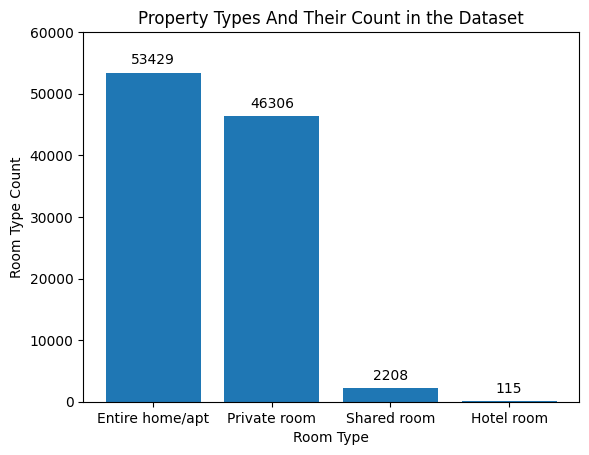

In [34]:
room_type_bar = plt.bar(property_types.index, property_types.loc[:,"count"]);
plt.bar_label(room_type_bar,labels = property_types.loc[:,"count"], padding = 4);
plt.ylim([0,60000])
plt.xlabel('Room Type')
plt.ylabel('Room Type Count')
plt.title('Property Types And Their Count in the Dataset');

In [35]:
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Manhattan,43557
Brooklyn,41630
Queens,13197
Bronx,2694
Staten Island,949
brookln,1
manhatan,1


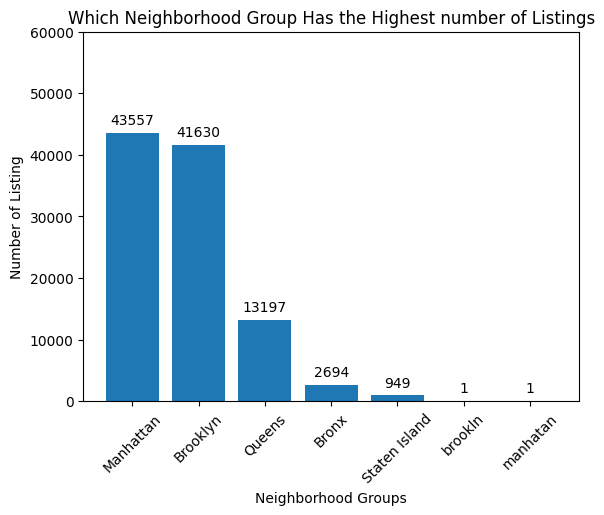

In [36]:
hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:,"count"]);
plt.bar_label(hood_group_bar,labels = hood_group.loc[:,"count"], padding = 4);
plt.ylim([0,60000]);
plt.xlabel('Neighborhood Groups');
plt.ylabel('Number of Listing');
plt.xticks(rotation = 45);
plt.title('Which Neighborhood Group Has the Highest number of Listings');

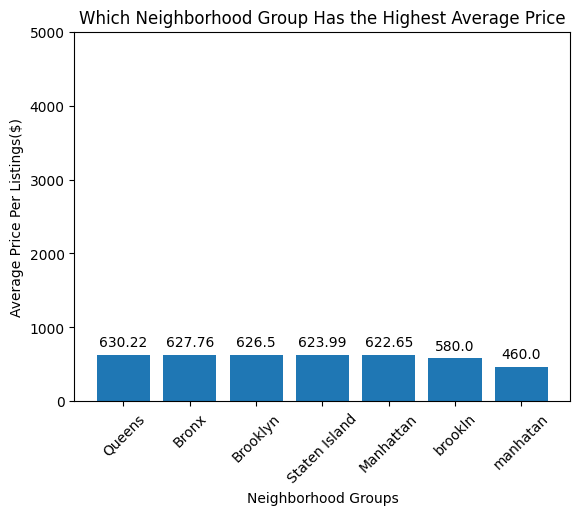

In [39]:
avg_price = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending = False).to_frame()
avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:,"price_$"]);
plt.bar_label(avg_price_bar,labels = round(avg_price.loc[:,"price_$"],2), label_type = 'edge', padding = 4);
plt.ylim([0,5000])
plt.xlabel('Neighborhood Groups');
plt.ylabel('Average Price Per Listings($)');
plt.xticks(rotation = 45);
plt.title('Which Neighborhood Group Has the Highest Average Price');

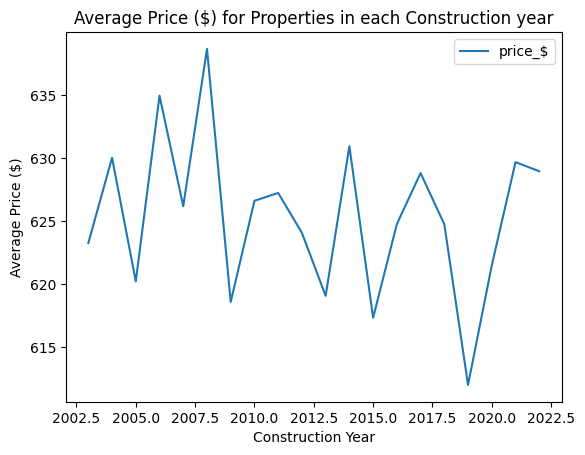

In [40]:
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot();
plt.xlabel('Construction Year');
plt.ylabel('Average Price ($)');
plt.title('Average Price ($) for Properties in each Construction year');

(0.0, 200000.0)

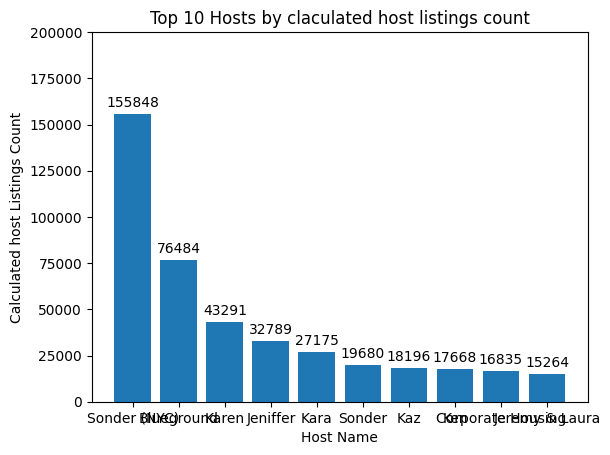

In [45]:
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending = False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:,"calculated host listings count"]);
plt.bar_label(hosts_bar,label = hosts.loc[:,"calculated host listings count"],label_type = 'edge', padding = 3);
plt.xlabel('Host Name');
plt.ylabel('Calculated host Listings Count');
plt.title('Top 10 Hosts by claculated host listings count');
plt.ylim([0,200000])

In [47]:
review =df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending =False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.285675
unconfirmed,3.272033


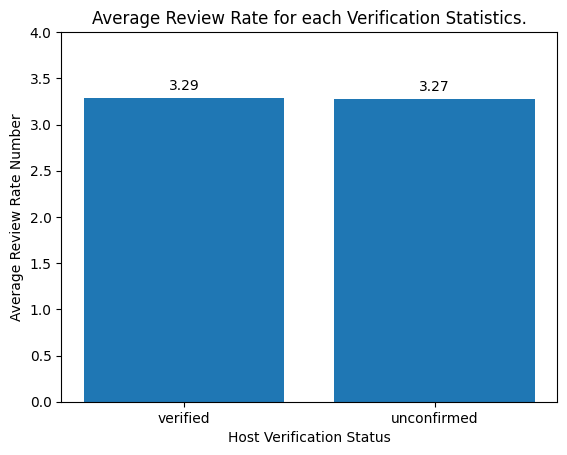

In [48]:
review_bar = plt.bar(review.index, review.loc[:, "review rate number"]);
plt.bar_label(review_bar, labels = round(review.loc[:, "review rate number"], 2), padding = 4);
plt.ylim([0,4]);
plt.xlabel('Host Verification Status');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate for each Verification Statistics.');

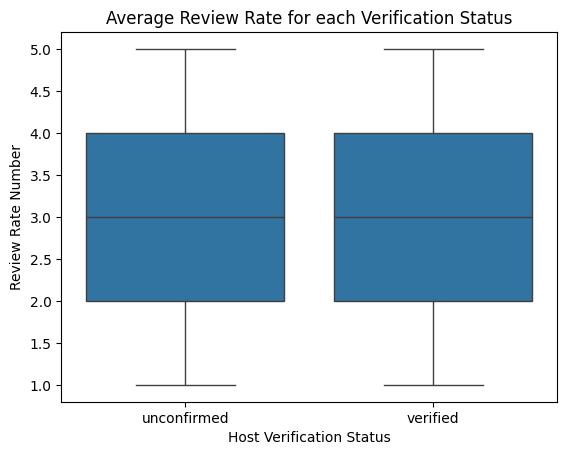

In [49]:
base_color = sns.color_palette()[0]
sns.boxplot(data = df, x = "host_identity_verified", y = "review rate number", color = base_color);
plt.xlabel('Host Verification Status');
plt.ylabel('Review Rate Number');
plt.title('Average Review Rate for each Verification Status');

In [50]:
# Is there a correlation between the price of a listing and its service fee?
df['price_$'].corr(df['service_fee_$'])



np.float64(0.9999908754521195)

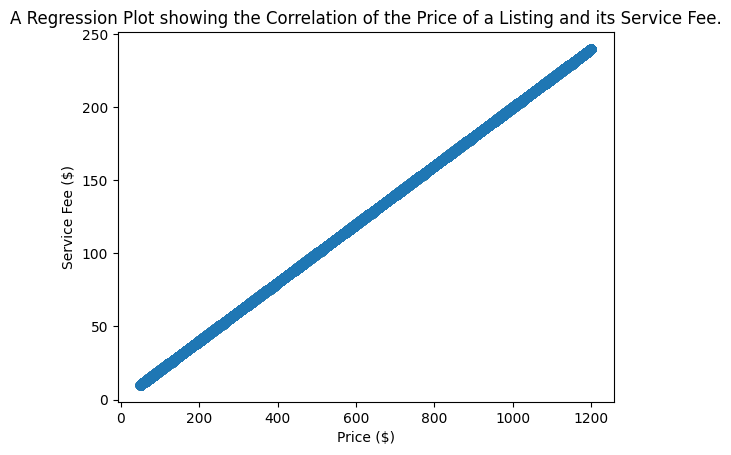

In [51]:

sns.regplot(df, x = 'price_$', y = 'service_fee_$');
plt.xlabel('Price ($)');
plt.ylabel('Service Fee ($)');
plt.title('A Regression Plot showing the Correlation of the Price of a Listing and its Service Fee.');

In [55]:
ARRN = df.groupby(['neighbourhood group','room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.346154
                    Private room               3.326873
                    Shared room                3.260870
Brooklyn            Entire home/apt            3.249963
                    Hotel room                 3.857143
                    Private room               3.263680
                    Shared room                3.334957
Manhattan           Entire home/apt            3.275869
                    Hotel room                 3.500000
                    Private room               3.277448
                    Shared room                3.254199
Queens              Entire home/apt            3.349306
                    Hotel room                 3.750000
                    Private room               3.315584
                    Shared room                3.369748
Staten Island       Entire home/apt            3.329087
                    Private room               3.477024
                    Shared room                3.533333
brookln             Private room               4.000000
manhatan            Private room               3.000000

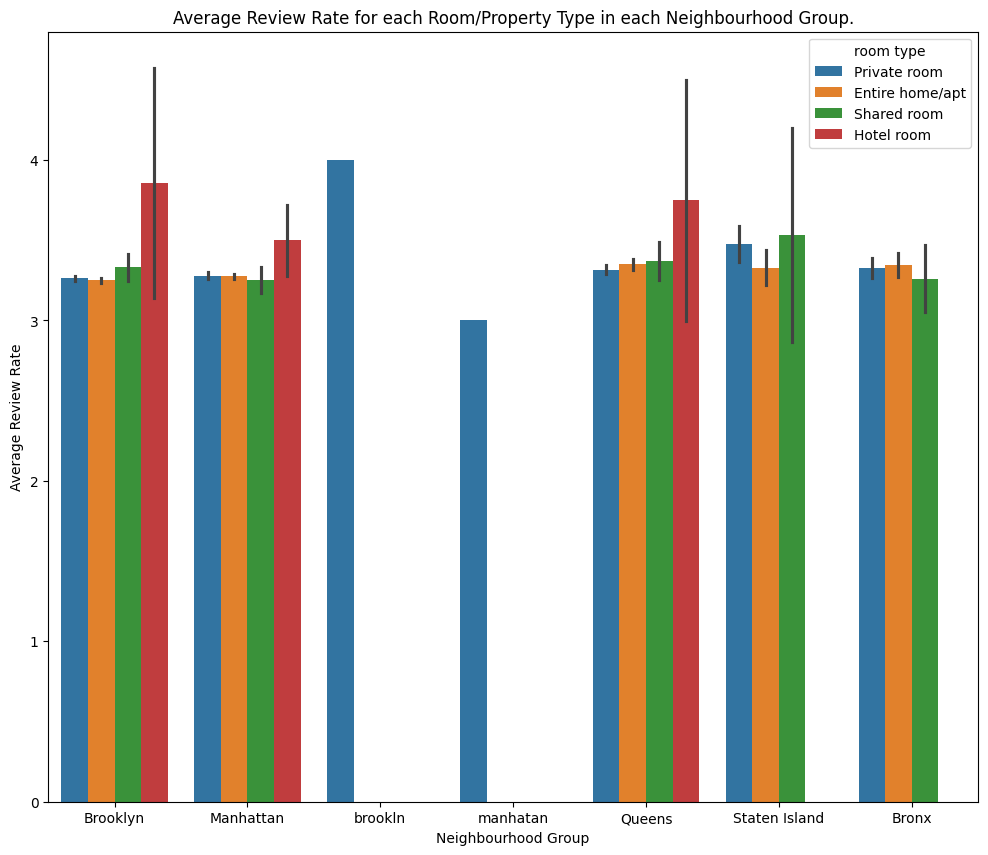

In [56]:
plt.figure(figsize = [12,10]);
sns.barplot(data = df, x = 'neighbourhood group', y = 'review rate number', hue = 'room type');
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Review Rate');
plt.title('Average Review Rate for each Room/Property Type in each Neighbourhood Group.');

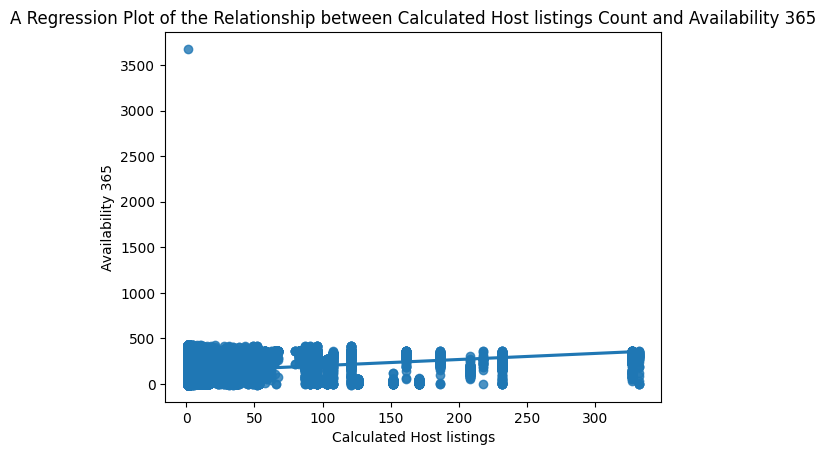

In [57]:
sns.regplot(df, x = 'calculated host listings count', y = 'availability 365');
plt.xlabel('Calculated Host listings');
plt.ylabel('Availability 365');
plt.title('A Regression Plot of the Relationship between Calculated Host listings Count and Availability 365');

In [60]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.1590051693819327)